In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pathlib import Path

notebook_path = Path.cwd()
target_dir = 'ai_practice'
project_root = ''

for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        break

dataset_dir = 'titanic/train.csv'
csv_path = project_root / 'assets/files' / dataset_dir
df = pd.read_csv(csv_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
avg_age = df.Age.mean()
avg_age

np.float64(29.69911764705882)

In [6]:
df.Age = df.Age.fillna(avg_age)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [11]:
df = df.dropna(subset=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
dummies_sex = pd.get_dummies(data=df.Sex, drop_first=True, dtype=int)

before_column = 'Age'
insertion_index = df.columns.get_loc(before_column)

left_part = df.iloc[:, :insertion_index]
right_part = df.iloc[:, insertion_index:]

df = pd.concat([left_part, dummies_sex, right_part], axis=1)
df = df.drop('Sex', axis=1)
df.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
dummies_embarked = pd.get_dummies(df.Embarked, drop_first=True, dtype=int)

df = pd.concat([df, dummies_embarked], axis=1)
df.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,1


In [18]:
df = df.drop('Embarked', axis=1)
df.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# TONOTE: Similar to LogisticRegress, a Decision Tree model also requires testing and training datasets
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.7584269662921348

In [25]:
# TONOTE: Tweak the max_depth to see how the accuracy changes

results = []

for i in range(1, 51):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_accuracy_score = accuracy_score(y_test, predictions)
    results.append(model_accuracy_score)
    print(f"max_depth={i}: {model_accuracy_score}")

max_depth=1: 0.797752808988764
max_depth=2: 0.797752808988764
max_depth=3: 0.8202247191011236
max_depth=4: 0.8202247191011236
max_depth=5: 0.8202247191011236
max_depth=6: 0.8202247191011236
max_depth=7: 0.8202247191011236
max_depth=8: 0.797752808988764
max_depth=9: 0.8089887640449438
max_depth=10: 0.7808988764044944
max_depth=11: 0.7696629213483146
max_depth=12: 0.7696629213483146
max_depth=13: 0.7471910112359551
max_depth=14: 0.7471910112359551
max_depth=15: 0.7359550561797753
max_depth=16: 0.7415730337078652
max_depth=17: 0.7528089887640449
max_depth=18: 0.7584269662921348
max_depth=19: 0.7584269662921348
max_depth=20: 0.7696629213483146
max_depth=21: 0.7584269662921348
max_depth=22: 0.7696629213483146
max_depth=23: 0.7584269662921348
max_depth=24: 0.7696629213483146
max_depth=25: 0.7471910112359551
max_depth=26: 0.7528089887640449
max_depth=27: 0.7640449438202247
max_depth=28: 0.7471910112359551
max_depth=29: 0.7584269662921348
max_depth=30: 0.7696629213483146
max_depth=31: 0.764044

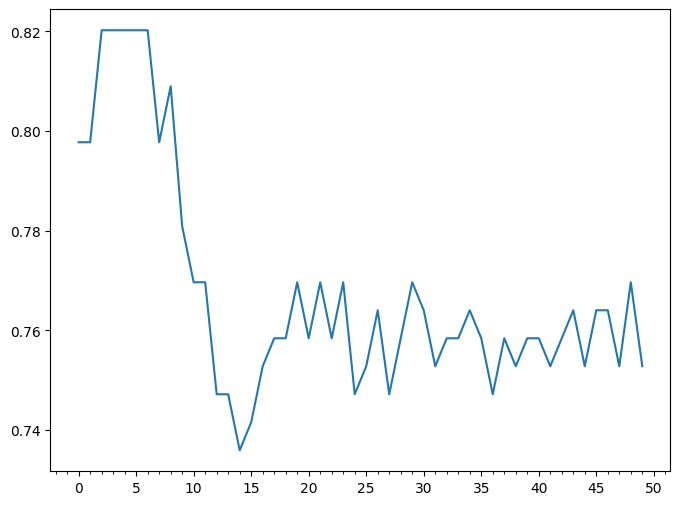

In [26]:
# Visualize it with a line plot

plt.figure(figsize=(8, 6))
sns.lineplot(data=results)
# plt.xticks(np.arange(0, 50, 5))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.show()

In [27]:
# TONOTE: After identifying that the accuracy score plateaus with the max_depth between 3 to 7, we can choose 5 as the max_depth value

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.8202247191011236

In [28]:
# TONOTE: Similar to LogisticRegression, we check the classification report for more accuracy details
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.82      0.68      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [29]:
# TONOTE: And also the confusion_matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['Prediction: No (0)', 'Prediction: Yes (1)'], index=['Real: No (0)', 'Real: Yes (1)'])

,Prediction: No (0),Prediction: Yes (1)
Real: No (0),99,10
Real: Yes (1),22,47


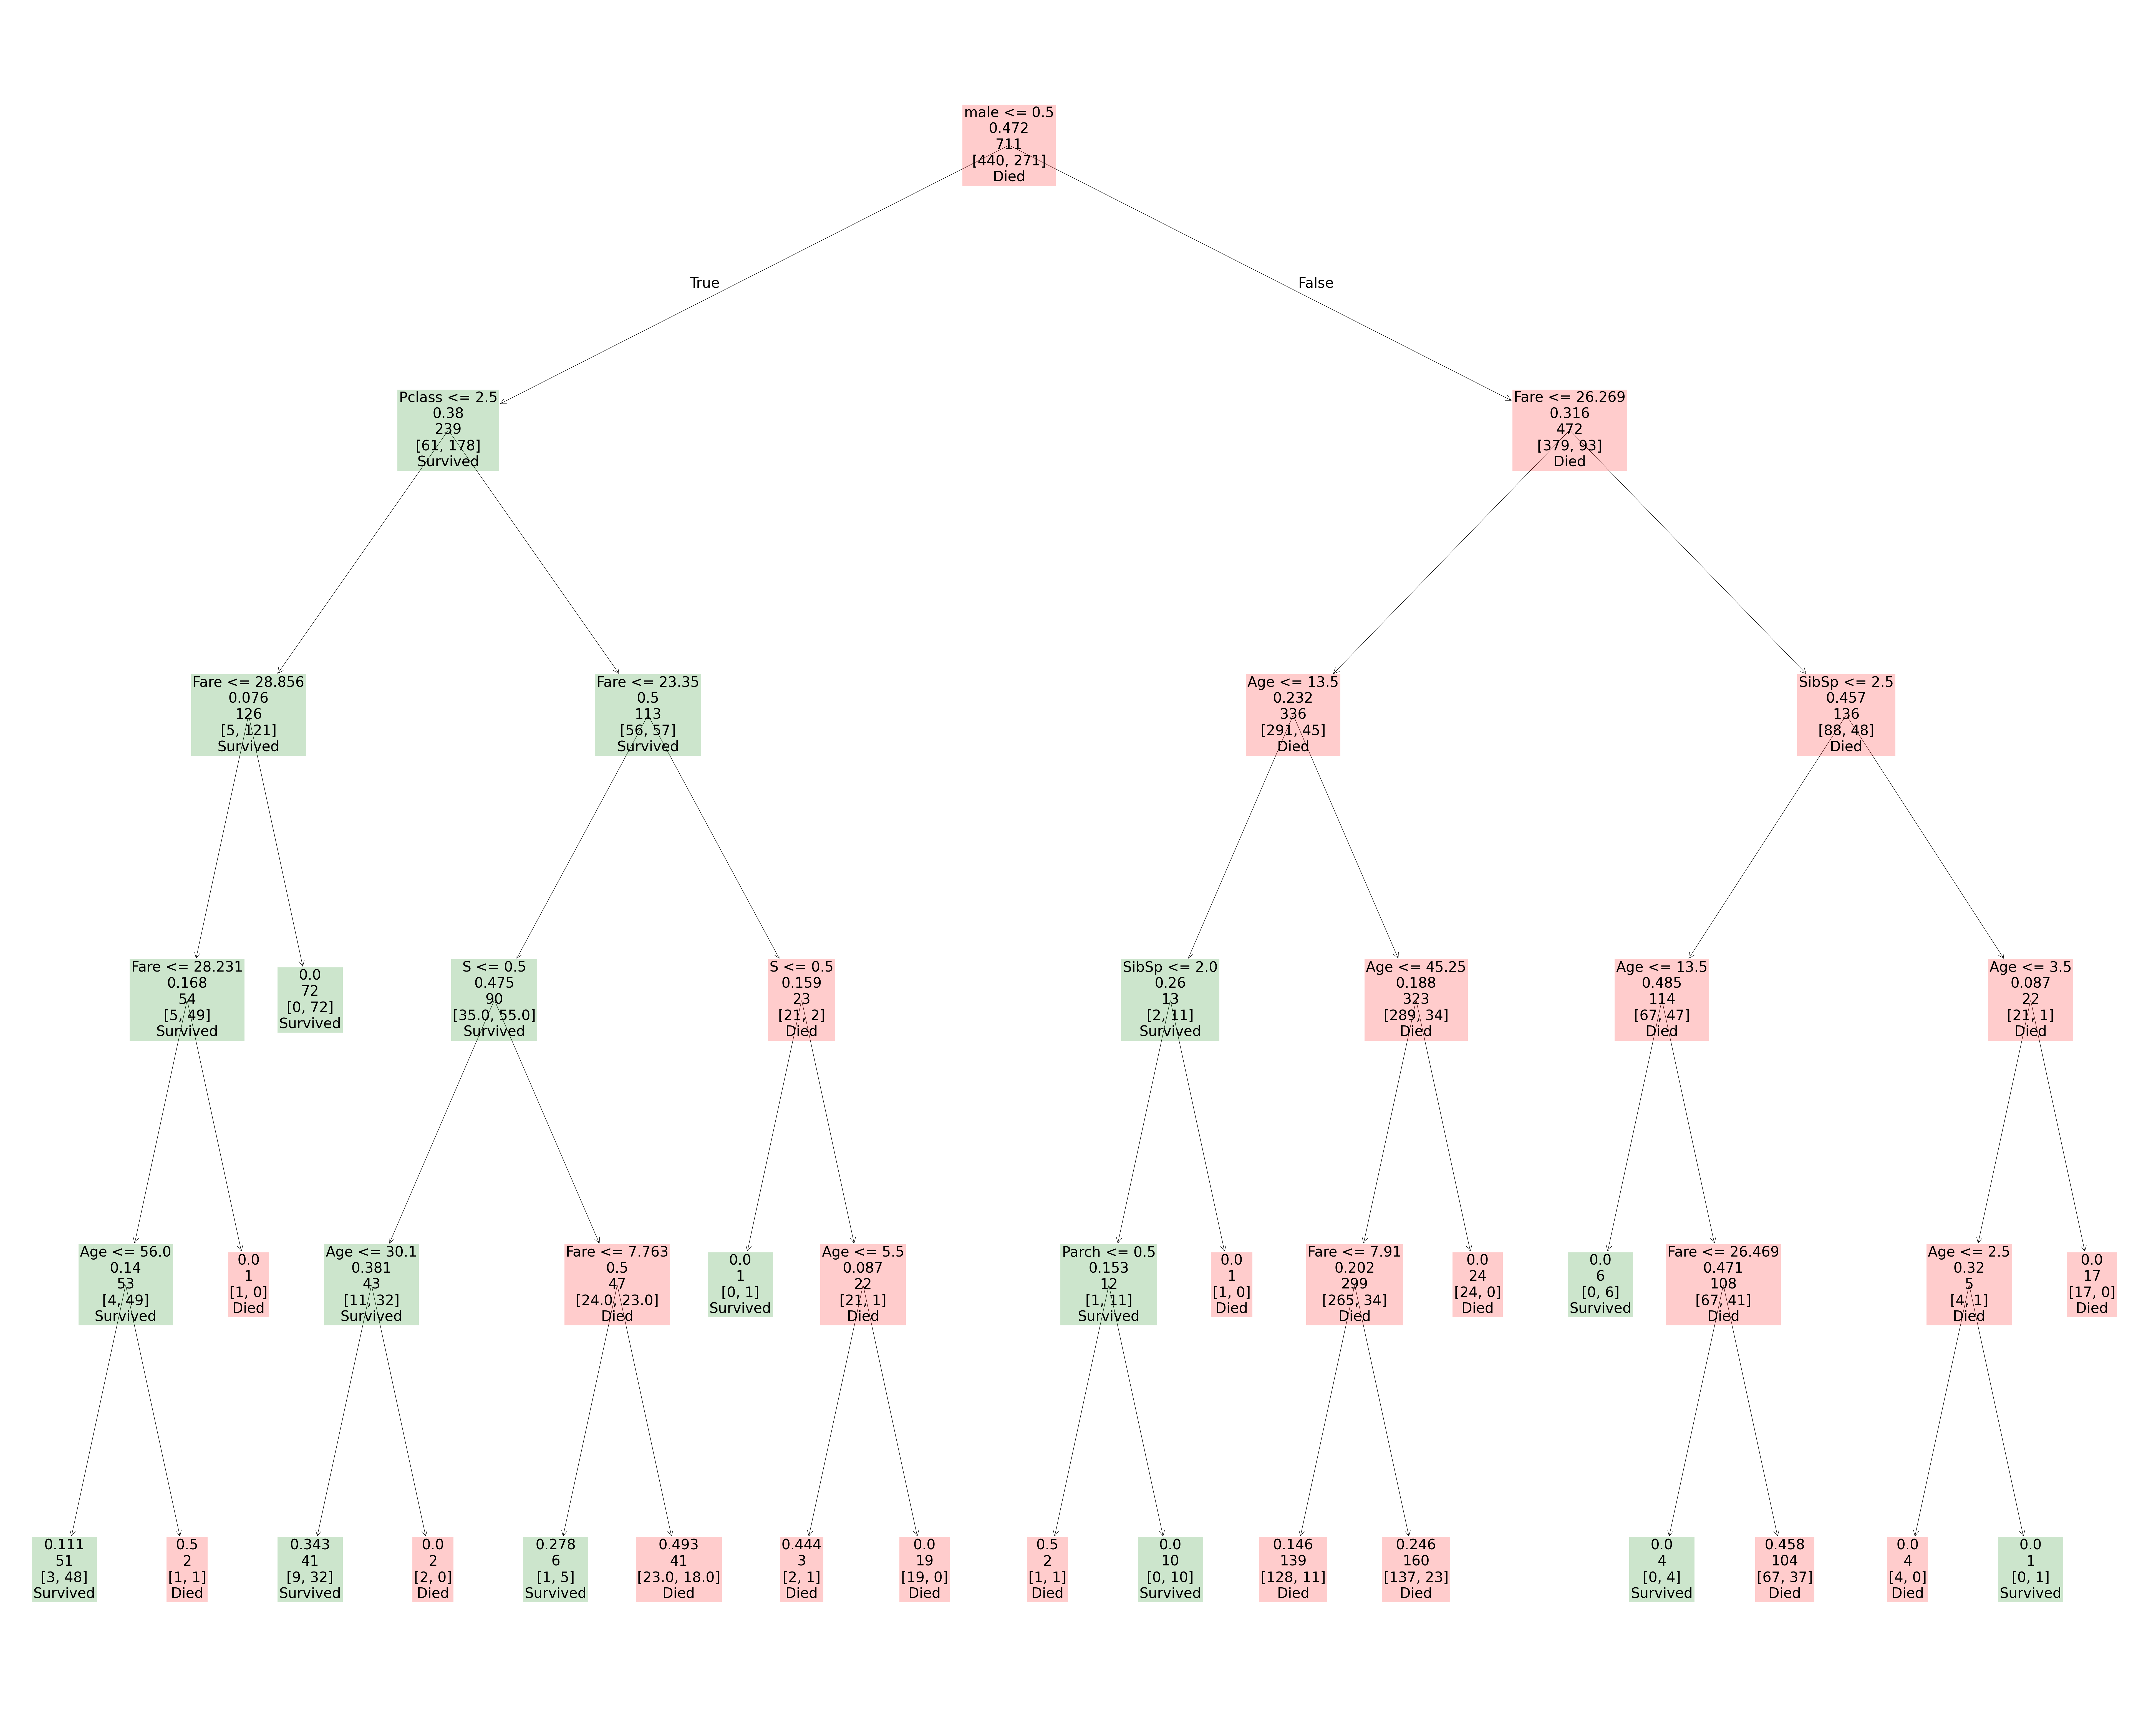

In [30]:
# TONOTE: Import the plot_tree sub-module from the sklearn.tree module to visualize the Tree
from sklearn.tree import plot_tree

# TONOTE: The Tree plot is built on top of Matplotlib.pyplot
plt.figure(figsize=(100, 80))
tree_plot = plot_tree(
    model,
    feature_names=X_train.columns, # TONOTE: Provide the column names of X_train to the feature_names param
    class_names=['Died', 'Survived'], # TONOTE: Manually set the conditions, 'Died' and 'Survived'
    label="none",
)

for i in range(len(tree_plot)):
    text = tree_plot[i].get_text() # get the text content of each node
    if 'Died' in text:
        # tree_plot[i].set_color('red') # set the text color
        # TONOTE: Use `.set_bbox` to set the background color of each box
        tree_plot[i].set_bbox(dict(facecolor='red', alpha=0.2, edgecolor='none'))
    elif 'Survived' in text:
        # tree_plot[i].set_color('green')
        tree_plot[i].set_bbox(dict(facecolor='green', alpha=0.2, edgecolor='none'))

plt.show()

### TONOTE: How do we determine the correct order of the labels in the confusion_matrix and decision tree visualization-specifically, why we know to put `No/Die` first and `Yes/Live` second? 

Answer: This order is determined by how the target variable is encoded internally by scikit-learn. By default, scikit-learn sorts the unique values in the target variable (y) and assigns them indices in ascending order. For binary classification:
- The first unique value (index 0) corresponds to the negative class ("No"/"Die")
- The second unique value (index 1) corresponds to the positive class ("Yes"/"Live")

In [31]:
# TONOTE: Verify this by checking the classes_ attribute of your fitted model:
print(model.classes_)

[0 1]


In [32]:
# We can also explicitly check which label is considered negative/positive:
y_train.head()

708    1
240    0
382    0
792    0
683    0
Name: Survived, dtype: int64

In [33]:
print(f"Unique values in `y_train`: {np.unique(y_train)}")

# 0 means died, 1 means survived

Unique values in `y_train`: [0 1]


## 1. Key Learning Points Analysis

### Model Training
1. **Decision Tree Dataset Requirements**
- **Concept**: `TONOTE: Similar to LogisticRegress, a Decision Tree model also requires testing and training datasets`
- **Explanation**: Decision trees follow the same data splitting requirements as other ML algorithms
- **Importance**: Proper model evaluation requires separate training and testing data
- **Implementation**:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Model Optimization
2. **Max Depth Parameter Tuning**
- **Concept**: `TONOTE: Tweak the max_depth to see how the accuracy changes`
- **Explanation**: Testing different tree depths helps find optimal model complexity
- **Importance**: Prevents overfitting while maintaining good prediction accuracy
- **Implementation**:


In [ ]:
for i in range(1, 51):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_accuracy_score = accuracy_score(y_test, predictions)



3. **Optimal Depth Selection**
- **Concept**: `TONOTE: After identifying that the accuracy score plateaus with the max_depth between 3 to 7, we can choose 5 as the max_depth value`
- **Explanation**: Choose the simplest model that achieves good performance
- **Importance**: Balances model complexity with accuracy
- **Best Practice**: Select the lowest max_depth that gives stable performance

### Model Evaluation
4. **Performance Metrics**
- **Concept**: `TONOTE: Similar to LogisticRegression, we check the classification report for more accuracy details`
- **Explanation**: Use multiple metrics to evaluate model performance
- **Importance**: Provides comprehensive view of model effectiveness
- **Implementation**: Uses confusion matrix and classification report

### Visualization
5. **Tree Structure Visualization**
- **Concept**: `TONOTE: Import the plot_tree sub-module from the sklearn.tree module to visualize the Tree`
- **Explanation**: Creates visual representation of decision paths
- **Implementation**:


In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 80))
tree_plot = plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=['Died', 'Survived'],
    label="none"
)



6. **Matplotlib Integration**
- **Concept**: `TONOTE: The Tree plot is built on top of Matplotlib.pyplot`
- **Explanation**: Decision tree visualization uses matplotlib as its foundation
- **Best Practice**: Customize plot size and appearance for better readability

7. **Feature Names in Visualization**
- **Concept**: `TONOTE: Provide the column names of X_train to the feature_names param`
- **Explanation**: Uses actual feature names instead of generic labels
- **Importance**: Makes tree interpretation more intuitive

8. **Class Label Visualization**
- **Concept**: `TONOTE: Manually set the conditions, 'Died' and 'Survived'`
- **Explanation**: Custom labels for decision outcomes
- **Importance**: Makes tree output human-readable

9. **Node Customization**
- **Concept**: `TONOTE: Use .set_bbox to set the background color of each box`
- **Explanation**: Visual enhancement of decision nodes
- **Implementation**: Different colors for different outcomes

[Rest of your request for Model/Process Implementation Summary remains valid but I've removed it since you specifically asked about the TONOTE markers issue]

## 2. Model/Process Implementation Summary

### Data Preparation Process

1. Initial Data Loading

In [ ]:
df = pd.read_csv(csv_path)

2. Missing Value Handling

- Filled missing Age values with mean
- Dropped Cabin column (too many missing values)
- Removed rows with missing Embarked values


3. Feature Selection

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

- Removed irrelevant columns
- Kept predictive features


4. Feature Engineering

- Converted Sex to numeric using get_dummies()
- Encoded Embarked using get_dummies()


### Model Training and Optimization

1. Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Training

- Used DecisionTreeClassifier
- Tested max_depth values from 1 to 50
- Selected optimal max_depth=5 based on accuracy plateau

### Evaluation Results

- Achieved 82% accuracy with optimal parameters
- Used multiple evaluation methods:
    - Classification report
    - Confusion matrix
    - Visual tree representation


### Notable Findings

- Model performance plateaued between max_depth 3-7
- Best accuracy achieved with simpler tree (max_depth=5)
- Clear visualization of decision paths through tree plotting
- Binary classification encoded as 0 (died) and 1 (survived)

The implementation shows a complete ML workflow focusing on interpretability through decision trees, with careful attention to hyperparameter tuning and visualization.